# Classify code discriptions

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [10]:

# Load dataset
df = pd.read_csv('analysis_dataset.csv')

# Feature extraction: TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed
X_tfidf = tfidf_vectorizer.fit_transform(df['analysis_text']).toarray()

# Label encoding
labels = pd.get_dummies(df['task'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)



##  Model 1

In [12]:
# Define a simple neural network model for classification
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(labels.shape[1], activation='softmax')  # Output layer nodes equal to number of tasks
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

Epoch 1/30
3/3 [==============================] - 1s 84ms/step - loss: 2.5638 - accuracy: 0.1111 - val_loss: 2.5631 - val_accuracy: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 29ms/step - loss: 2.5182 - accuracy: 0.4889 - val_loss: 2.5525 - val_accuracy: 0.2000
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 2.4402 - accuracy: 0.6222 - val_loss: 2.5293 - val_accuracy: 0.1000
Epoch 4/30
3/3 [==============================] - 0s 27ms/step - loss: 2.2883 - accuracy: 0.6222 - val_loss: 2.4857 - val_accuracy: 0.1000
Epoch 5/30
3/3 [==============================] - 0s 26ms/step - loss: 2.0389 - accuracy: 0.6889 - val_loss: 2.4270 - val_accuracy: 0.1000
Epoch 6/30
3/3 [==============================] - 0s 25ms/step - loss: 1.6718 - accuracy: 0.8000 - val_loss: 2.2844 - val_accuracy: 0.2000
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 1.1939 - accuracy: 0.9000 - val_loss: 2.1442 - val_accuracy: 0.2000
Epoch 8/30
3/3 [===========

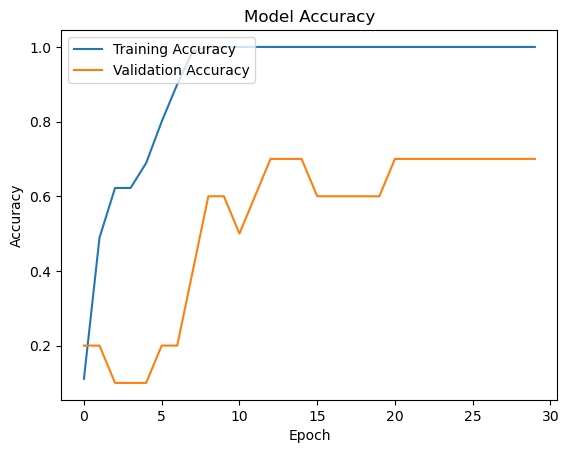

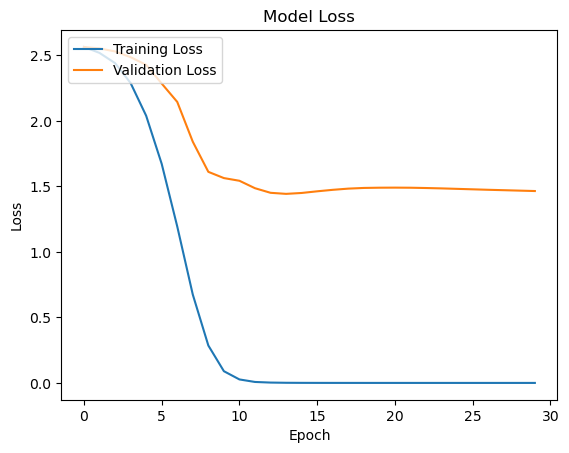

In [13]:
import matplotlib.pyplot as plt


# Plotting training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plotting training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

##  model 2

In [5]:
import re
from transformers import AutoTokenizer

# Load dataset
df = pd.read_csv('analysis_dataset.csv')

# Preprocess text: simple cleaning (extend as needed)
def clean_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with spaces
    return text

df['analysis_text'] = df['analysis_text'].apply(clean_text)

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize text
def tokenize(texts, max_length=512):  # Adjust max_length as needed
    return tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf')

texts = df['analysis_text'].tolist()
inputs = tokenize(texts)


In [6]:
from sklearn.model_selection import train_test_split

# Assuming 'inputs' is a dictionary with 'input_ids' from the tokenizer
input_ids = inputs['input_ids'].numpy()

# Assuming 'labels' is already a numpy array from earlier steps
labels = pd.get_dummies(df['task']).values

# Split the data
X_train_ids, X_test_ids, y_train, y_test = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Now, you have numpy arrays for inputs and labels correctly split


In [8]:
from transformers import TFDistilBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Initialize the model
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(labels[0]))

# Initialize the optimizer
optimizer = Adam(learning_rate=5e-5)

# Compile the model with the optimizer and loss function
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Prepare the inputs as TensorFlow tensors
import tensorflow as tf

X_train_tf = tf.constant(X_train_ids)
X_test_tf = tf.constant(X_test_ids)

# Model Training (note: you might need to adjust the input format based on the model's requirements)
history = model.fit(X_train_tf, y_train, epochs=3, batch_size=4, validation_split=0.1)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/3
20/23 [=========================>....] - ETA: 8s - loss: 2.5878 - accuracy: 0.0500 


KeyboardInterrupt



In [9]:
model.evaluate(X_test_tokens['input_ids'], y_test)


1/1 [==============================] - 5s 5s/step - loss: 2.5667 - accuracy: 0.0000e+00


[2.5667128562927246, 0.0]